In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/MyDrive/MS/4th Sem/DATA 606 Capstone/Dataset/Merged Data'

In [ ]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Healthcare.csv")

In [ ]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15918 entries, 0 to 15917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                15918 non-null  object 
 1   Symbol              15918 non-null  object 
 2   Series              15918 non-null  object 
 3   Prev Close          15918 non-null  float64
 4   Open                15918 non-null  float64
 5   High                15918 non-null  float64
 6   Low                 15918 non-null  float64
 7   Last                15918 non-null  float64
 8   Close               15918 non-null  float64
 9   VWAP                15918 non-null  float64
 10  Volume              15918 non-null  int64  
 11  Turnover            15918 non-null  float64
 12  Trades              7368 non-null   float64
 13  Deliverable Volume  14367 non-null  float64
 14  %Deliverble         14367 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.8

In [ ]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  15918.000000  15918.000000  15918.000000  15918.000000  15918.000000   
mean    1038.560199   1039.883154   1055.272610   1023.201658   1038.657529   
std      887.788244    889.492386    900.045617    877.797448    888.332821   
min      160.100000    150.550000    169.450000    145.000000    152.000000   
25%      499.962500    500.000000    508.887500    490.262500    499.962500   
50%      712.225000    713.000000    724.300000    702.000000    712.200000   
75%     1228.112500   1228.000000   1251.812500   1200.000000   1226.787500   
max     5416.800000   5440.950000   5512.650000   5329.450000   5413.000000   

              Close          VWAP        Volume      Turnover         Trades  \
count  15918.000000  15918.000000  1.591800e+04  1.591800e+04    7368.000000   
mean    1038.703615   1039.423598  1.406101e+06  1.050296e+14   53481.115499   
std      888.372388    888.951495  3.610570e+06 

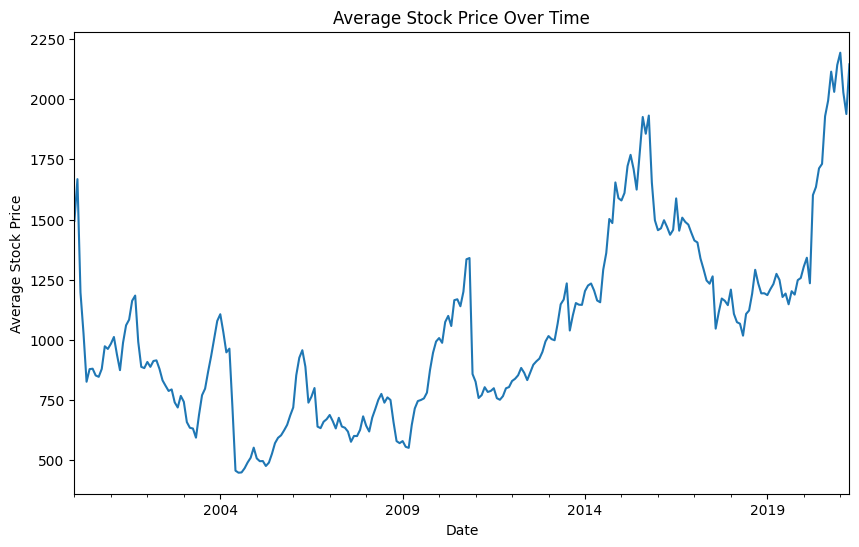

In [ ]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

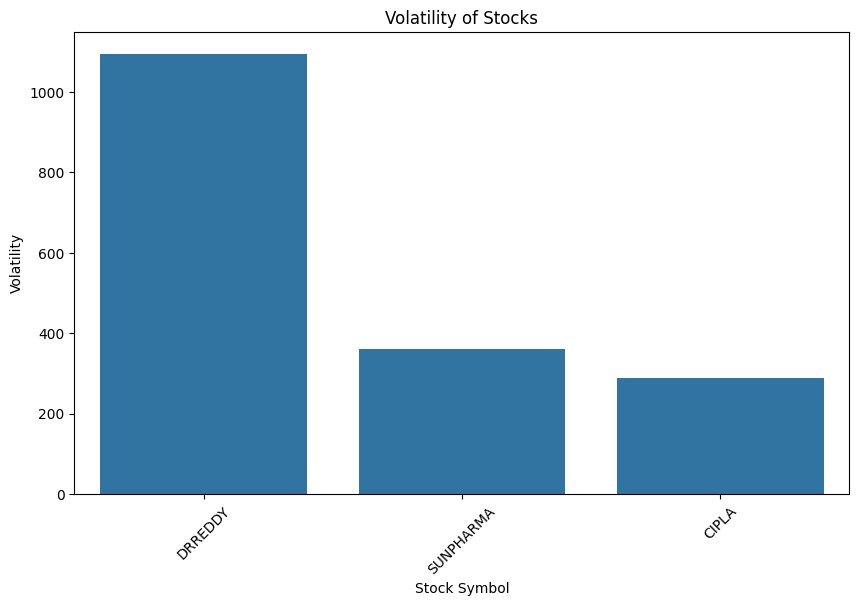

In [ ]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

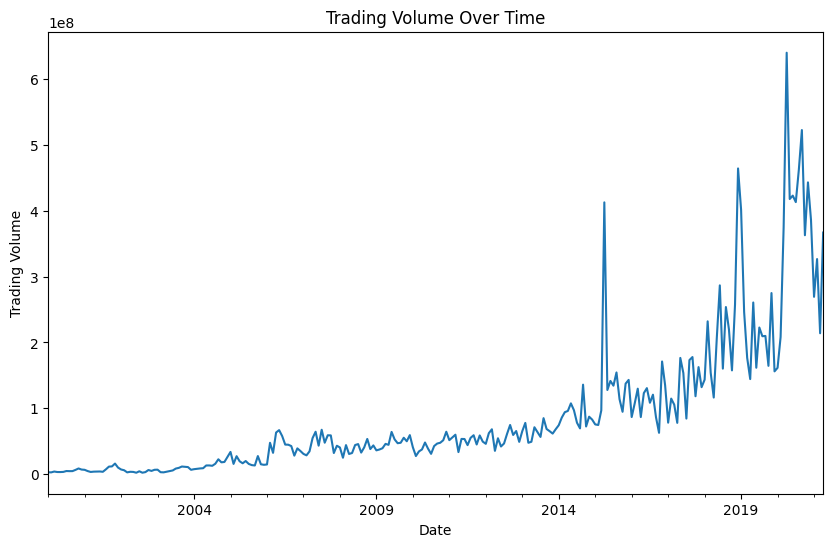

In [ ]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


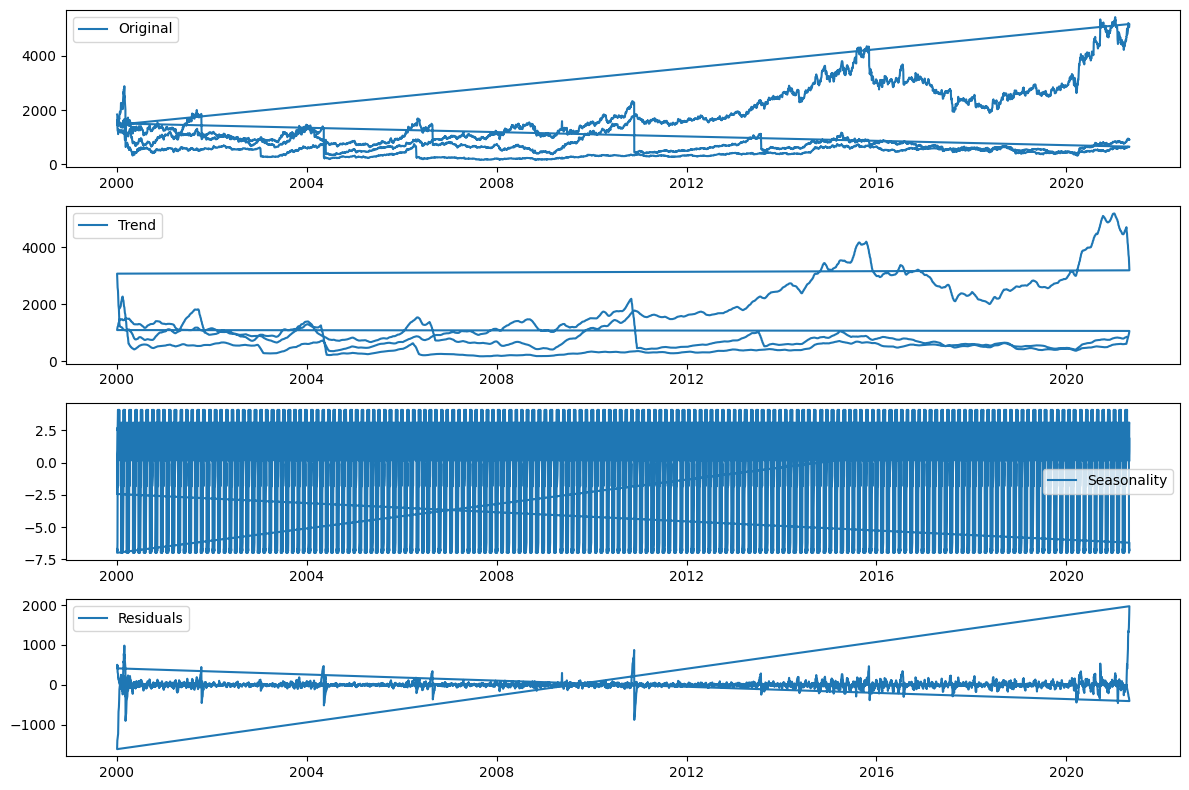

In [ ]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

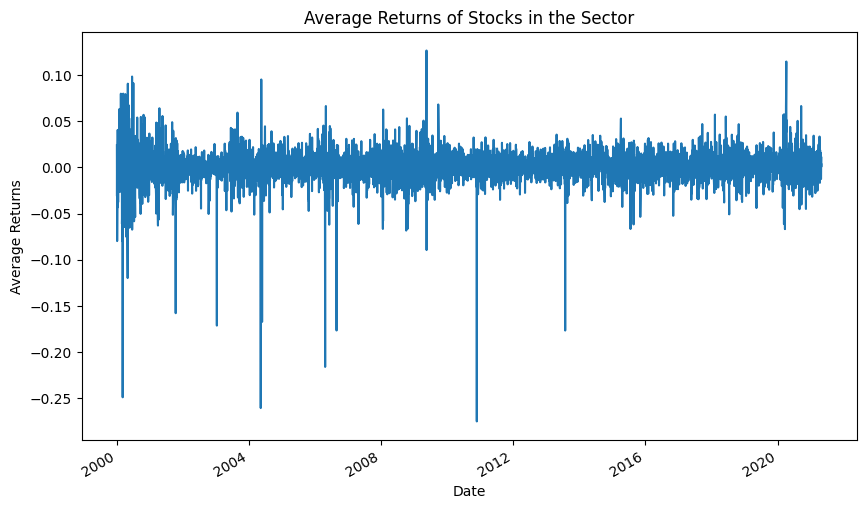

In [ ]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()